In [26]:
%run init.ipynb

### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Generalized Gell-Mann matrices
A matriz identidade e as matrizes generalizadas de Gell-Mann formam uma base para $\mathbb{C}^{d\text{x}d}$ e são dadas por (https://arxiv.org/abs/1603.05284):
\begin{align}
& \Gamma_{j}^{d} = \sqrt{\frac{2}{j(j+1)}}\sum_{k=1}^{j+1}(-1)^{\delta_{k,j+1}}|k\rangle\langle k|\text{, } j=1,\cdots,d-1, \\
& \Gamma_{k,l}^{s} = |k\rangle\langle l|+|l\rangle\langle k|\text{, }1\le k<l\le d, \\
& \Gamma_{k,l}^{a} = -i(|k\rangle\langle l|-|l\rangle\langle k|)\text{, }1\le k<l\le d.
\end{align}
Remark. The last two groups have $d(d-1)/2$ generators each. One can verify that for these matrices:
\begin{align}
& \mathrm{Tr}(\Gamma_{g}) = 0\text{, traceless} \\
& \Gamma_{g}=\Gamma_{g}^{\dagger}\text{, Hermitian} \\
& \mathrm{Tr}(\Gamma_{g}\Gamma_{g'}) = 2\delta_{gg'}\text{, can be made orthonormal.}
\end{align}

Orthonormal GGM basis
\begin{equation}
\left\{\frac{\Gamma_{0}}{\sqrt{d}},\frac{\Gamma_{j}^{d}}{\sqrt{2}},\frac{\Gamma_{k,l}^{s}}{\sqrt{2}},\frac{\Gamma_{k,l}^{a}}{\sqrt{2}}\right\},
\end{equation}
with $1\le j < d-1$ and $1\le k<l\le d$.

In [9]:
def gell_mann(d, g, j, k):
    gm = np.zeros((d,d), dtype= complex)
    if g == 'i':  # identity
        for j in range(0,d):
            gm[j,j] = 1
    elif g == 'd':  # diagonal
        nt = math.sqrt(2/(j*(j+1)))
        for m in range(0,j):
            gm[m,m] = nt
        gm[j,j] = -j*nt
    elif g == 's':  # symmetric
        gm[j-1,k-1] = 1;  gm[k-1,j-1] = 1
    elif g == 'a':  # anti-symmetric
        gm[j-1,k-1] = -1j;  gm[k-1,j-1] = 1j
    return gm

In [10]:
gell_mann(2, 'i', 0, 0), gell_mann(2, 'd', 1, 1), gell_mann(2, 's', 1, 2), gell_mann(2, 'a', 1, 2)

(array([[1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]),
 array([[ 1.+0.j,  0.+0.j],
        [ 0.+0.j, -1.+0.j]]),
 array([[0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]),
 array([[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]))

# Decomposition of $A\in\mathbb{C}^{d\mathrm{x}d}$ in GGM basis
Let's make use of Hilbert-Schmidt inner product,
\begin{equation}
\langle A|B\rangle := \mathrm{Tr}(A^{\dagger}B),
\end{equation}
and the $d\mathrm{x}d$ identity matrix $\Gamma_{0}^{d}$ to identify the orthonormal basis, the GGMB: 
\begin{equation}
\Gamma_{g}:=\{\Gamma_{0}^{d}/\sqrt{d},\Gamma_{g}/\sqrt{2}\}
\end{equation}
for $\mathbb{C}^{d\mathrm{x}d}$, i.e., $\mathrm{Tr}(\Gamma_{g}'\Gamma_{g'}') = \delta_{gg'}$, and write
\begin{align}
A & = \sum_{g}c_{g}\Gamma_{g} = \sum_{g}\langle\Gamma_{g}|A\rangle\Gamma_{g} = \sum_{g}\mathrm{Tr}(\Gamma_{g}^{\dagger}A)\Gamma_{g} = \sum_{g}\mathrm{Tr}(\Gamma_{g}A)\Gamma_{g} \\
& = \mathrm{Tr}(d^{-1/2}\Gamma_{0}A)d^{-1/2}\Gamma_{0} + \sum_{g}\mathrm{Tr}(2^{-1/2}\Gamma_{g}A)2^{-1/2}\Gamma_{g} \\
& = d^{-1}\mathrm{Tr}(A)\Gamma_{0} + 2^{-1}\sum_{g}\mathrm{Tr}(\Gamma_{g}A)\Gamma_{g} \\
& = \frac{\mathrm{Tr}(A)}{d}\Gamma_{0} +  \sum_{j=1}^{d-1}\frac{\mathrm{Tr}(\Gamma_{j}^{d}A)}{2}\Gamma_{j}^{d}  + \sum_{\substack{k,l\\1\le k<l\le d}}\frac{\mathrm{Tr}(\Gamma_{(k,l)}^{s}A)}{2}\Gamma_{(k,l)}^{s}  +  \sum_{\substack{k,l\\1\le k<l\le d}}\frac{\mathrm{Tr}(\Gamma_{(k,l)}^{a}A)}{2}\Gamma_{(k,l)}^{a} \\
& = \frac{\mathrm{Tr}(A)}{\sqrt{d}}\frac{\Gamma_{0}}{\sqrt{d}} +  \sum_{j=1}^{d-1}\frac{\mathrm{Tr}(\Gamma_{j}^{d}A)}{\sqrt{2}}\frac{\Gamma_{j}^{d}}{\sqrt{2}}  + \sum_{\substack{k,l\\1\le k<l\le d}}\frac{\mathrm{Tr}(\Gamma_{(k,l)}^{s}A)}{\sqrt{2}}\frac{\Gamma_{(k,l)}^{s}}{\sqrt{2}}  +  \sum_{\substack{k,l\\1\le k<l\le d}}\frac{\mathrm{Tr}(\Gamma_{(k,l)}^{a}A)}{\sqrt{2}}\frac{\Gamma_{(k,l)}^{a}}{\sqrt{2}}.
\end{align}

The coefficients of this decomposition can be obtained from the so called Bloch's vector:
\begin{equation}
\vec{\beta} = \left(\mathrm{Tr}(A),\{\mathrm{Tr}(A\Gamma_{j}^{d})\},\{\mathrm{Tr}(A\Gamma_{k,l}^{\tau})\}\right), 
\end{equation}
with $\tau = s, a$.
For the first component we have
\begin{equation}
\mathrm{Tr}(A)=\sum_{j=1}^{d}A_{jj}.
\end{equation}
For the $d-1$ _diagonal_ generators:
\begin{align}
\mathrm{Tr}(\Gamma_{j}^{d}A) & = \sqrt{\frac{2}{j(j+1)}}\sum_{k=1}^{j+1}(-j)^{\delta_{k,j+1}}\mathrm{Tr}(|k\rangle\langle k|A) \\
& = \sqrt{\frac{2}{j(j+1)}}\sum_{k=1}^{j+1}(-j)^{\delta_{k,j+1}}\langle k|A|k\rangle \\
& = \sqrt{\frac{2}{j(j+1)}}\left(\sum_{k=1}^{j}A_{k,k} - jA_{j+1,j+1}\right).
\end{align}

For the $d(d-1)/2$  _symmetric_ generators ($1\le k<l\le d$):
\begin{align}
\mathrm{Tr}(\Gamma_{(k,l)}^{s}A) & = \mathrm{Tr}((|k\rangle\langle l|+|l\rangle\langle k|)A) \\
& = A_{l,k} + A_{k,l}.
\end{align}
If $A=A^{\dagger}$ then $\mathrm{Tr}(\Gamma_{(k,l)}^{s}A)=A_{l,k} + A_{l,k}^{*}=2\Re A_{l,k}$.

For the $d(d-1)/2$  _anti-symmetric_ generators ($1\le k<l\le d$):
\begin{align}
\mathrm{Tr}(\Gamma_{(k,l)}^{a}A) & = -i\mathrm{Tr}((|k\rangle\langle l|-|l\rangle\langle k|)A) \\
& = -i(A_{l,k} - A_{k,l}).
\end{align}
If $A=A^{\dagger}$ then $\mathrm{Tr}(\Gamma_{(k,l)}^{a}A)= -i(A_{l,k} - A_{l,k}^{*})=2\Im A_{l,k}$.

The code we provide to compute the Bloch vector assumes the following sequencing for its components:
\begin{align}
\beta_{0} & = \mathrm{Tr}(A) \text{, } \\
\beta_{j} & = \mathrm{Tr}(\Gamma_{j}^{d}A) \text{ for } j=1,\cdots,d-1\text{, } \\
\beta_{j} & = \mathrm{Tr}(\Gamma_{k,l}^{s}A) \text{ for } j=d,\cdots,2^{-1}d(d+1)-1 \\
\beta_{j} & = \mathrm{Tr}(\Gamma_{k,l}^{a}A) \text{ for } j=2^{-1}d(d+1),\cdots,d^{2}-1.
\end{align}
For the last two groups, we use the convetion:
\begin{align}
& k=1\text{, }l=2,\cdots,d, \\
& k=2\text{, }l=3,\cdots,d, \\
& \vdots, \\
& k=d-1\text{, }l=d
\end{align}
as the sequences for $k,l$ when increasing the index $j$.  

In [17]:
def bloch_vector(A):
    d = A.shape[0]; bv = np.zeros((d**2-1), dtype = complex)
    #bv[0] = trace(d,A)
    for j in range(1,d):   # diagonal
        bv[j-1] = 0
        for k in range(1,j+1):
            bv[j-1] += A[k-1,k-1]
        bv[j-1] -= j*A[j,j]
        bv[j-1] *= math.sqrt(2/(j*(j+1)))
    for k in range(1,d):  # symmetric
        for l in range(k+1,d+1):
            j += 1
            bv[j-1] = A[l-1,k-1] + A[k-1,l-1]
    for k in range(1,d):  # anti-symmetric
        for l in range(k+1,d+1):
            j += 1
            bv[j-1] = -1j*(A[l-1,k-1] - A[k-1,l-1])
    return bv.real

In [18]:
s0 = np.array([[1,0],[0,1]]); s1 = np.array([[0,1],[1,0]])
s2 = np.array([[0,-1j],[1j,0]]); s3 = np.array([[1,0],[0,-1]])
A = 0.5*(s0 + 0.1*s1 + 0.2*s2 + 0.3*s3); bloch_vector(A)

array([0.3, 0.1, 0.2])

# Decomposition of $M\in\mathbb{C}^{d_{a}\mathrm{x}d_{a}}\otimes\mathbb{C}^{d_{b}\mathrm{x}d_{b}}$ in local GGMB
Now the orthonormal basis is the tensor product of the local basis:
\begin{align}
& \frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}\otimes\frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}},
\frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}\otimes\left\{\frac{\Gamma_{j}^{d}}{\sqrt{2}}\right\}_{j},
\left\{\frac{\Gamma_{j}^{d}}{\sqrt{2}}\right\}_{j}\otimes \frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}},
\left\{\frac{\Gamma_{j}^{d}}{\sqrt{2}}\right\}_{j}\otimes\left\{\frac{\Gamma_{k}^{d}}{\sqrt{2}}\right\}_{k}, \\
& \frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}\otimes\left\{\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\right\}_{k,l,g},
\left\{\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\right\}_{k,l,g}\otimes\frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}}, \\
& \left\{\frac{\Gamma_{j}^{d}}{\sqrt{2}}\right\}_{j}\otimes\left\{\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\right\}_{k,l,g},
\left\{\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\right\}_{k,l,g}\otimes\left\{\frac{\Gamma_{j}^{d}}{\sqrt{2}}\right\}_{j}, \\
& \left\{\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\right\}_{k,l,g}\otimes\left\{\frac{\Gamma_{m,n}^{h}}{\sqrt{2}}\right\}_{m,n,h},
\end{align}
where $g,h=s,a$.

Now
\begin{align}
M = & \frac{\mathrm{Tr}(M)}{\sqrt{d_{a}d_{b}}}\frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}\otimes\frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}} +
\sum_{j}\frac{\mathrm{Tr}(\mathbb{I}_{d_{a}}\otimes\Gamma_{j}^{d}M)}{\sqrt{d_{a}2}}\frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}\otimes\frac{\Gamma_{j}^{d}}{\sqrt{2}} +
\sum_{j}\frac{\mathrm{Tr}(\Gamma_{j}^{d}\otimes\mathbb{I}_{d_{b}}M)}{\sqrt{2d_{b}}}\frac{\Gamma_{j}^{d}}{\sqrt{2}}\otimes\frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}} \\
& +\sum_{k,l,g}\frac{\mathrm{Tr}(\mathbb{I}_{d_{a}}\otimes\Gamma_{k,l}^{g}M)}{\sqrt{d_{a}2}}\frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}\otimes\frac{\Gamma_{k,l}^{g}}{\sqrt{2}} +
\sum_{k,l,g}\frac{\mathrm{Tr}(\Gamma_{k,l}^{g}\otimes\mathbb{I}_{d_{b}}M)}{\sqrt{2d_{b}}}\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\otimes\frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}} \\ 
& + \sum_{j,k}\frac{\mathrm{Tr}(\Gamma_{j}^{d}\otimes\Gamma_{k}^{d}M)}{\sqrt{2}\sqrt{2}}\frac{\Gamma_{j}^{d}}{\sqrt{2}}\otimes\frac{\Gamma_{k}^{d}}{\sqrt{2}}
+ \sum_{j,k,l,g}\frac{\mathrm{Tr}(\Gamma_{j}^{d}\otimes\Gamma_{k,l}^{g}M)}{\sqrt{2}\sqrt{2}}\frac{\Gamma_{j}^{d}}{\sqrt{2}}\otimes\frac{\Gamma_{k,l}^{g}}{\sqrt{2}} \\
& + \sum_{k,l,g,j}\frac{\mathrm{Tr}(\Gamma_{k,l}^{g}\otimes\Gamma_{j}^{d}M)}{\sqrt{2}\sqrt{2}}\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\otimes\frac{\Gamma_{j}^{d}}{\sqrt{2}}
+ \sum_{k,l,g,m,n,h}\frac{\mathrm{Tr}(\Gamma_{k,l}^{g}\otimes\Gamma_{m,n}^{h}M)}{\sqrt{2}\sqrt{2}}\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}\otimes\frac{\Gamma_{m,n}^{h}}{\sqrt{2}}.
\end{align}

The reduce matrices are defined via partial trace [Int. J. Mod. Phys. C 28, 1750005,(2016)]:
\begin{align}
M_{a} & = \mathrm{Tr}_{b}(M) = \sum_{j=1}^{d_{b}}(\mathbb{I}_{a}\otimes\langle j|)M(\mathbb{I}_{a}\otimes|j\rangle), \\
M_{b} & = \mathrm{Tr}_{a}(M) = \sum_{j=1}^{d_{a}}(\langle j|\otimes\mathbb{I}_{b})M(|j\rangle\otimes\mathbb{I}_{b}).
\end{align}
Besides, for any operators $A\in\mathbb{C}^{d_{a}\mathrm{x}d_{a}}$ and $B\in\mathbb{C}^{d_{b}\mathrm{x}d_{b}}$ we have
\begin{align}
& \mathrm{Tr}_{ab}(A\otimes\mathbb{I}_{b}M) = \mathrm{Tr}_{a}(AM_{a}) \\
& \mathrm{Tr}_{ab}(\mathbb{I}_{a}\otimes BM) = \mathrm{Tr}_{b}(BM_{b}).
\end{align}
So the coefficients in the first two rows in the equation for $M$ can be cumputed from the local Bloch vectors, since
\begin{align}
& \mathrm{Tr}(\mathbb{I}_{d_{a}}\otimes\Gamma_{j}^{d}M) = \mathrm{Tr}(\Gamma_{j}^{d}M_{b}), \\
& \mathrm{Tr}(\Gamma_{j}^{d}\otimes\mathbb{I}_{d_{a}}M) = \mathrm{Tr}(\Gamma_{j}^{d}M_{a}), \\
& \mathrm{Tr}(\mathbb{I}_{d_{a}}\otimes\Gamma_{k,l}^{g}M) = \mathrm{Tr}(\Gamma_{k,l}^{g}M_{b}), \\
& \mathrm{Tr}(\Gamma_{k,l}^{g}\otimes\mathbb{I}_{d_{a}}M) = \mathrm{Tr}(\Gamma_{k,l}^{g}M_{a})
\end{align}

and
\begin{align}
M_{a} & = \frac{\mathrm{Tr}(M)}{\sqrt{d_{a}}}\frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}  +
\sum_{j}\frac{\mathrm{Tr}(\Gamma_{j}^{d}\otimes\mathbb{I}_{d_{b}}M)}{\sqrt{2}}\frac{\Gamma_{j}^{d}}{\sqrt{2}} + \sum_{k,l,g}\frac{\mathrm{Tr}(\Gamma_{k,l}^{g}\otimes\mathbb{I}_{d_{b}}M)}{\sqrt{2}}\frac{\Gamma_{k,l}^{g}}{\sqrt{2}} \\
& = \frac{\mathrm{Tr}(M_{a})}{\sqrt{d_{a}}}\frac{\mathbb{I}_{d_{a}}}{\sqrt{d_{a}}}  +
\sum_{j}\frac{\mathrm{Tr}(\Gamma_{j}^{d}M_{a})}{\sqrt{2}}\frac{\Gamma_{j}^{d}}{\sqrt{2}} + \sum_{k,l,g}\frac{\mathrm{Tr}(\Gamma_{k,l}^{g}M_{a})}{\sqrt{2}}\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}, \\
M_{b} & = \frac{\mathrm{Tr}(M)}{\sqrt{d_{b}}}\frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}}  +
\sum_{j}\frac{\mathrm{Tr}(\mathbb{I}_{d_{a}}\otimes\Gamma_{j}^{d}M)}{\sqrt{2}}\frac{\Gamma_{j}^{d}}{\sqrt{2}} + \sum_{k,l,g}\frac{\mathrm{Tr}(\mathbb{I}_{d_{a}}\otimes\Gamma_{k,l}^{g}M)}{\sqrt{2}}\frac{\Gamma_{k,l}^{g}}{\sqrt{2}} \\
& = \frac{\mathrm{Tr}(M_{b})}{\sqrt{d_{b}}}\frac{\mathbb{I}_{d_{b}}}{\sqrt{d_{b}}}  +
\sum_{j}\frac{\mathrm{Tr}(\Gamma_{j}^{d}M_{b})}{\sqrt{2}}\frac{\Gamma_{j}^{d}}{\sqrt{2}} + \sum_{k,l,g}\frac{\mathrm{Tr}(\Gamma_{k,l}^{g}M_{b})}{\sqrt{2}}\frac{\Gamma_{k,l}^{g}}{\sqrt{2}}.
\end{align}

The coefficients in the last two rows in the equation for $M$ are obtained from the __correlation matrix__
\begin{equation}
C = \begin{bmatrix} C^{dd} & C^{ds} & C^{da} \\ C^{sd} & C^{ss} & C^{sa} \\ C^{ad} & C^{as} & C^{aa} \end{bmatrix},
\end{equation}
where
\begin{align}
& C^{dd} = \left(\mathrm{Tr}(\Gamma_{j}^{d}\otimes\Gamma_{k}^{d}M)\right) \in\mathbb{C}^{(d_{a}-1)\mathrm{x}(d_{b}-1)} \\
& C^{dg} = \left(\mathrm{Tr}(\Gamma_{j}^{d}\otimes\Gamma_{k,l}^{g}M)\right) \in\mathbb{C}^{(d_{a}-1)\mathrm{x}(2^{-1}d_{b}(d_{b}-1))} \\
& C^{gd} = \left(\mathrm{Tr}(\Gamma_{k,l}^{g}\otimes\Gamma_{j}^{d}M)\right) \in\mathbb{C}^{(2^{-1}d_{a}(d_{a}-1))\mathrm{x}(d_{b}-1)} \\
& C^{gh} = \left(\mathrm{Tr}(\Gamma_{k,l}^{g}\otimes\Gamma_{m,n}^{h}M)\right) \in\mathbb{C}^{(2^{-1}d_{a}(d_{a}-1))\mathrm{x}(2^{-1}d_{b}(d_{b}-1))}.
\end{align}

Computing the average values <br>
### diagonal-diagonal
\begin{align}
C_{j,k}^{dd} & = \mathrm{Tr}\left(\Gamma_{j}^{d}\otimes\Gamma_{k}^{d}M\right) \\
& = \mathrm{Tr}\left(\sqrt{\frac{2}{j(j+1)}}\sum_{m=1}^{j+1}(-j)^{\delta_{m,j+1}}|m\rangle\langle m|\otimes\sqrt{\frac{2}{k(k+1)}}\sum_{n=1}^{k+1}(-k)^{\delta_{n,k+1}}|n\rangle\langle n|M\right) \\
& = \frac{2}{\sqrt{j(j+1)k(k+1)}}\sum_{m=1}^{j+1}(-j)^{\delta_{m,j+1}}\sum_{n=1}^{k+1}(-k)^{\delta_{n,k+1}}\mathrm{Tr}\left(|m\rangle\langle m|\otimes|n\rangle\langle n|M\right) \\
& = \frac{2}{\sqrt{j(j+1)k(k+1)}}\sum_{m=1}^{j+1}\sum_{n=1}^{k+1}(-j)^{\delta_{m,j+1}}(-k)^{\delta_{n,k+1}}\mathrm{Tr}\left(|m\rangle\otimes|n\rangle\langle m|\otimes\langle n|M\right) \\
& = \frac{2}{\sqrt{j(j+1)k(k+1)}}\sum_{m=1}^{j+1}\sum_{n=1}^{k+1}(-j)^{\delta_{m,j+1}}(-k)^{\delta_{n,k+1}}\langle m|\otimes\langle n|M|m\rangle\otimes|n\rangle \\
& = \frac{2}{\sqrt{j(j+1)k(k+1)}}\sum_{m=1}^{j+1}\sum_{n=1}^{k+1}(-j)^{\delta_{m,j+1}}(-k)^{\delta_{n,k+1}}M_{((m-1)d_{b}+n),((m-1)d_{b}+n)}.
\end{align}

In [22]:
def corr_mat_dd(da, db, M):
    cmdd = np.zeros((da-1,db-1), dtype = complex)
    for j in range(1,da):
        for k in range(1,db):
            for m in range(1,j+1):
                for n in range(1,k+1):
                    cmdd[j-1,k-1] += M[(m-1)*db+(n-1),(m-1)*db+(n-1)]
            m = j+1
            for n in range(1,k+1):
                cmdd[j-1,k-1] -= j*M[(m-1)*db+(n-1),(m-1)*db+(n-1)]
            n = k+1
            for m in range(1,j+1):
                cmdd[j-1,k-1] -= k*M[(m-1)*db+(n-1),(m-1)*db+(n-1)]
            m = j+1
            n = k+1
            cmdd[j-1,k-1] += j*k*M[(m-1)*db+(n-1),(m-1)*db+(n-1)]
            cmdd[j-1,k-1] *= 2/sqrt(j*(j+1)*k*(k+1))
    return cmdd.real

In [23]:
def Pauli(j):
    if j == 0:
        return np.array([[1,0],[0,1]])
    elif j == 1:
        return np.array([[0,1],[1,0]])
    elif j == 2:
        return np.array([[0,-1j],[1j,0]])
    elif j == 3:
        return np.array([[1,0],[0,-1]])

In [24]:
def rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33):
    return (1/4)*(tp(Pauli(0),Pauli(0)) + b1*tp(Pauli(0),Pauli(1)) + b2*tp(Pauli(0),Pauli(2)) + b3*tp(Pauli(0),Pauli(3))
           + a1*tp(Pauli(1),Pauli(0)) + c11*tp(Pauli(1),Pauli(1)) + c12*tp(Pauli(1),Pauli(2)) + c13*tp(Pauli(1),Pauli(3))
           + a2*tp(Pauli(2),Pauli(0)) + c21*tp(Pauli(2),Pauli(1)) + c22*tp(Pauli(2),Pauli(2)) + c23*tp(Pauli(2),Pauli(3))
           + a3*tp(Pauli(3),Pauli(0)) + c31*tp(Pauli(3),Pauli(1)) + c32*tp(Pauli(3),Pauli(2)) + c33*tp(Pauli(3),Pauli(3)))

In [27]:
a1, a2, a3, b1, b2, b3 = 0.11, 0.12, 0.13, 0.25, 0.26, 0.27
c11, c12, c13, c21, c22, c23, c31, c32, c33 = 0.11, 0.12, 0.13, 0.21, 0.22, 0.23, 0.31, 0.32, 0.33
corr_mat_dd(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33))

array([[0.33]])

### diagonal-symmetric:
\begin{equation}
C^{ds}_{j,(k,l)} = \sqrt{\frac{2}{j(j+1)}}\sum_{m=1}^{j+1}(-j)^{\delta_{m,j+1}}\left(M_{((m-1)d_{b}+l),((m-1)d_{b}+k)}+M_{((m-1)d_{b}+k),((m-1)d_{b}+l)}\right).
\end{equation}

In [28]:
def corr_mat_ds(da, db, M):
    cmds = np.zeros((da-1,db*(db-1)//2), dtype = complex)
    for j in range(1,da):
        n = 0
        for k in range(1,db):
            for l in range(k+1,db+1):
                n += 1
                for m in range(1,j+1):
                    cmds[j-1,n-1] += (M[(m-1)*db+(l-1),(m-1)*db+(k-1)] + M[(m-1)*db+(k-1),(m-1)*db+(l-1)])
                m = j+1
                cmds[j-1,n-1] -= j*(M[(m-1)*db+(l-1),(m-1)*db+(k-1)] + M[(m-1)*db+(k-1),(m-1)*db+(l-1)])
                cmds[j-1,n-1] *= sqrt(2/(j*(j+1)))
    return cmds.real

In [29]:
corr_mat_ds(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33))

array([[0.31]])

### diagonal-antisymmetric:
\begin{equation}
C^{da}_{j,(k,l)} = -i\sqrt{\frac{2}{j(j+1)}}\sum_{m=1}^{j+1}(-j)^{\delta_{m,j+1}}\left(M_{((m-1)d_{b}+l),((m-1)d_{b}+k)}-M_{((m-1)d_{b}+k),((m-1)d_{b}+l)}\right).
\end{equation}

In [45]:
def corr_mat_da(da, db, M):
    cmda = np.zeros((da-1,db*(db-1)//2), dtype = complex)
    for j in range(1,da):
        n = 0
        for k in range(1,db):
            for l in range(k+1,db+1):
                n += 1
                for m in range(1,j+1):
                    cmda[j-1,n-1] += (M[(m-1)*db+(l-1),(m-1)*db+(k-1)] - M[(m-1)*db+(k-1),(m-1)*db+(l-1)])
                m = j+1
                cmda[j-1,n-1] -= j*(M[(m-1)*db+(l-1),(m-1)*db+(k-1)] - M[(m-1)*db+(k-1),(m-1)*db+(l-1)])
                cmda[j-1,n-1] *= -1j*sqrt(2/(j*(j+1)))
    return cmda.real

In [46]:
corr_mat_da(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33))

array([[0.32]])

### symmetric-diagonal:
\begin{equation}
C^{sd}_{(k,l),j} = \sqrt{\frac{2}{j(j+1)}}\sum_{m=1}^{j+1}(-j)^{\delta_{m,j+1}}\left(M_{((l-1)d_{b}+m),((k-1)d_{b}+m)}+M_{((k-1)d_{b}+m),((l-1)d_{b}+m)}\right).
\end{equation}

In [30]:
def corr_mat_sd(da, db, M):
    cmsd = np.zeros((da*(da-1)//2,db-1), dtype = complex)
    n = 0
    for k in range(1,da):
        for l in range(k+1,da+1):
            n += 1
            for j in range(1,db):    
                for m in range(1,j+1):
                    cmsd[n-1,j-1] += (M[(l-1)*db+(m-1),(k-1)*db+(m-1)] + M[(k-1)*db+(m-1),(l-1)*db+(m-1)])
                m = j+1
                cmsd[n-1,j-1] -= j*(M[(l-1)*db+(m-1),(k-1)*db+(m-1)] + M[(k-1)*db+(m-1),(l-1)*db+(m-1)])
                cmsd[n-1,j-1] *= sqrt(2/(j*(j+1)))
    return cmsd.real

In [31]:
corr_mat_sd(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33))

array([[0.13]])

### antisymmetric-diagonal:
\begin{equation}
C^{ad}_{(k,l),j} = -i\sqrt{\frac{2}{j(j+1)}}\sum_{m=1}^{j+1}(-j)^{\delta_{m,j+1}}\left(M_{(l-1)d_{b}+m),((k-1)d_{b}+m)}-M_{((k-1)d_{b}+m),((l-1)d_{b}+m)}\right).
\end{equation}

In [32]:
def corr_mat_ad(da, db, M):
    cmad = np.zeros((da*(da-1)//2,db-1), dtype = complex)
    n = 0
    for k in range(1,da):
        for l in range(k+1,da+1):
            n += 1
            for j in range(1,db):    
                for m in range(1,j+1):
                    cmad[n-1,j-1] += (M[(l-1)*db+m-1,(k-1)*db+m-1] - M[(k-1)*db+m-1,(l-1)*db+m-1])
                m = j+1
                cmad[n-1,j-1] -= j*(M[(l-1)*db+m-1,(k-1)*db+m-1] - M[(k-1)*db+m-1,(l-1)*db+m-1])
                cmad[n-1,j-1] *= -1j*sqrt(2/(j*(j+1)))
    return cmad.real

In [33]:
corr_mat_ad(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33))

array([[0.23]])

### symmetric-symmetric
\begin{equation}
C^{ss}_{(k,l),(m,n)} = M_{(l-1)d_{b}+n,(k-1)d_{b}+m} + M_{(k-1)d_{b}+m,(l-1)d_{b}+n} + M_{(l-1)d_{b}+m,(k-1)d_{b}+n} + M_{(k-1)d_{b}+n,(l-1)d_{b}+m}
\end{equation}

In [34]:
def corr_mat_ss(da, db, M):
    cmss = np.zeros((da*(da-1)//2,db*(db-1)//2), dtype = complex)
    p = 0
    for k in range(1,da):
        for l in range(k+1,da+1):
            p += 1
            q = 0
            for m in range(1,db):
                for n in range(m+1,db+1):
                    q += 1
                    cmss[p-1,q-1] += (M[(l-1)*db+n-1,(k-1)*db+m-1] + M[(k-1)*db+m-1,(l-1)*db+n-1])
                    cmss[p-1,q-1] += (M[(l-1)*db+m-1,(k-1)*db+n-1] + M[(k-1)*db+n-1,(l-1)*db+m-1])
    return cmss.real

In [35]:
corr_mat_ss(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33))

array([[0.11]])

### symmetric-antisymmetric
\begin{equation}
C^{sa}_{(k,l),(m,n)} = -i\left(M_{(l-1)d_{b}+n,(k-1)d_{b}+m} - M_{(k-1)d_{b}+m,(l-1)d_{b}+n} + M_{(k-1)d_{b}+n,(l-1)d_{b}+m} - M_{(l-1)d_{b}+m,(k-1)d_{b}+n}\right)
\end{equation}

In [36]:
def corr_mat_sa(da, db, M):
    cmsa = np.zeros((da*(da-1)//2,db*(db-1)//2), dtype = complex)
    p = 0
    for k in range(1,da):
        for l in range(k+1,da+1):
            p += 1
            q = 0
            for m in range(1,db):
                for n in range(m+1,db+1):
                    q += 1
                    cmsa[p-1,q-1] -= 1j*(M[(l-1)*db+n-1,(k-1)*db+m-1] - M[(k-1)*db+m-1,(l-1)*db+n-1])
                    cmsa[p-1,q-1] -= 1j*(M[(k-1)*db+n-1,(l-1)*db+m-1] - M[(l-1)*db+m-1,(k-1)*db+n-1])
    return cmsa.real

In [37]:
simplify(corr_mat_sa(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33)))

### antisymmetric-symmetric
\begin{equation}
C^{as}_{(k,l),(m,n)} = -i\left(M_{(l-1)d_{b}+n,(k-1)d_{b}+m} - M_{(k-1)d_{b}+m,(l-1)d_{b}+n} + M_{(l-1)d_{b}+m,(k-1)d_{b}+n} - M_{(k-1)d_{b}+n,(l-1)d_{b}+m}\right)
\end{equation}

In [38]:
def corr_mat_as(da, db, M):
    cmas = np.zeros((da*(da-1)//2,db*(db-1)//2), dtype = complex)
    p = 0
    for k in range(1,da):
        for l in range(k+1,da+1):
            p += 1
            q = 0
            for m in range(1,db):
                for n in range(m+1,db+1):
                    q += 1
                    cmas[p-1,q-1] -= 1j*(M[(l-1)*db+n-1,(k-1)*db+m-1] - M[(k-1)*db+m-1,(l-1)*db+n-1])
                    cmas[p-1,q-1] -= 1j*(M[(l-1)*db+m-1,(k-1)*db+n-1] - M[(k-1)*db+n-1,(l-1)*db+m-1])
    return cmas.real

In [39]:
simplify(corr_mat_as(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33)))

### antisymmetric-antisymmetric
\begin{equation}
C^{aa}_{(k,l),(m,n)} = M_{(l-1)d_{b}+m,(k-1)d_{b}+n} + M_{(k-1)d_{b}+n,(l-1)d_{b}+m} - M_{(l-1)d_{b}+n,(k-1)d_{b}+m} - M_{(k-1)d_{b}+m,(l-1)d_{b}+n}
\end{equation}

In [40]:
def corr_mat_aa(da, db, M):
    cmaa = np.zeros((da*(da-1)//2,db*(db-1)//2), dtype = complex)
    p = 0
    for k in range(1,da):
        for l in range(k+1,da+1):
            p += 1
            q = 0
            for m in range(1,db):
                for n in range(m+1,db+1):
                    q += 1
                    cmaa[p-1,q-1] += (M[(l-1)*db+m-1,(k-1)*db+n-1] + M[(k-1)*db+n-1,(l-1)*db+m-1])
                    cmaa[p-1,q-1] -= (M[(l-1)*db+n-1,(k-1)*db+m-1] + M[(k-1)*db+m-1,(l-1)*db+n-1])
    return cmaa.real

In [41]:
corr_mat_aa(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33))

array([[0.22]])

## Correlation matrix

In [49]:
def corr_mat(da, db, M):
    dda = int((da*(da-1))/2); ddb = int((db*(db-1))/2); cm = np.zeros((da**2-1,db**2-1))
    k = -1; l = -1
    cmdd = corr_mat_dd(da, db, M); cmds = corr_mat_ds(da, db, M); cmda = corr_mat_da(da, db, M)
    for m in range(0,da-1): 
        k += 1
        for n in range(0,db-1):  # diagonal-diagonal
            l += 1; cm[k,l] = cmdd[m,n]
        for n in range(0,ddb):  # diagonal-symmetric
            l += 1; cm[k,l] = cmds[m,n]
        for n in range(0,ddb):  # diagonal-antisymmetric
            l += 1; cm[k,l] = cmda[m,n]
    cmsd = corr_mat_sd(da, db, M); cmss = corr_mat_ss(da, db, M); cmsa = corr_mat_sa(da, db, M)
    l = -1
    for m in range(0,dda): 
        k += 1
        for n in range(0,db-1):  # symmetric-diagonal
            l += 1; cm[k,l] = cmsd[m,n]
        for n in range(0,ddb):  # symmetric-symmetric
            l += 1; cm[k,l] = cmss[m,n]
        for n in range(0,ddb):  # symmetric-antisymmetric
            l += 1; cm[k,l] = cmsa[m,n]
    cmad = corr_mat_ad(da, db, M); cmas = corr_mat_as(da, db, M); cmaa = corr_mat_aa(da, db, M)
    l = -1
    for m in range(0,dda): 
        k += 1
        for n in range(0,db-1):  # antisymmetric-diagonal
            l += 1; cm[k,l] = cmad[m,n]
        for n in range(0,ddb):  # antisymmetric-symmetric
            l += 1; cm[k,l] = cmas[m,n]
        for n in range(0,ddb):  # antisymmetric-antisymmetric
            l += 1; cm[k,l] = cmaa[m,n]
    return cm.real

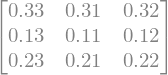

In [50]:
simplify(corr_mat(2,2,rho2qb(a1, a2, a3, b1, b2, b3, c11, c12, c13, c21, c22, c23, c31, c32, c33)))